In [1]:
!pip install skforecast

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from mpl_toolkits.basemap import Basemap
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [3]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_chida.csv'
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 29/08/2014 to 23/03/2016
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   int64  
 2   No. of confirmed deaths  1648 non-null   float64
 3   Male Cases               2484 non-null   float64
 4   Female Cases             2484 non-null   float64
 5   Boys                     2484 non-null   float64
 6   Girls                    2484 non-null   float64
 7   Adult Male               2484 non-null   float64
 8   Adult Female             2484 non-null   float64
 9   Old Male                 2484 non-null   float64
 10  Old Female               2484 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 232.9+ KB


In [5]:
df.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


In [6]:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
23/03/2016,Nigeria,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76
23/03/2016,United States of America,4,1.0,2.4,1.6,0.72,0.48,1.44,0.96,0.24,0.16


In [7]:
df.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
29/08/2014,False,False,False,False,False,False,False,False,False,False,False
05/09/2014,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,True,False,False,False,False,False,False,False,False
23/03/2016,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
Male Cases                   0
Female Cases                 0
Boys                         0
Girls                        0
Adult Male                   0
Adult Female                 0
Old Male                     0
Old Female                   0
dtype: int64

In [9]:
df['Country'].isin(['Mexico']).sum()

0

In [10]:
conteo=df.groupby('Country').size().reset_index(name='Conteo')
conteo

,Country,Conteo
0,Guinea,259
1,Italy,141
2,Liberia,364
3,Mali,243
4,Nigeria,255
5,Senegal,254
6,Sierra Leone,259
7,Spain,243
8,United Kingdom,221
9,United States of America,245


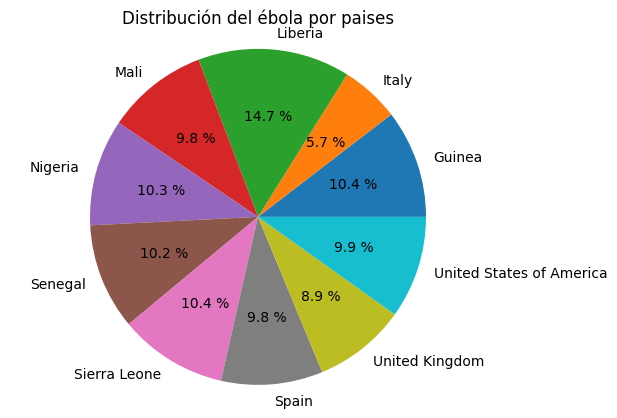

In [11]:
plt.pie(conteo['Conteo'],labels=conteo['Country'],autopct="%0.1f %%")
plt.axis("equal")
plt.title("Distribución del ébola por paises")
plt.savefig('Pastel_paises.png', dpi=300, format='png')
plt.show()

In [12]:
SL=df[df['Country']=='Sierra Leone']

In [13]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
05/09/2014,Sierra Leone,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84
08/09/2014,Sierra Leone,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36
12/09/2014,Sierra Leone,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48
16/09/2014,Sierra Leone,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56


In [14]:
SL = SL.drop('Country', axis=1)

In [15]:
SL[15:20]

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,
22/10/2014,3223,986.0,1933.8,1289.2,580.14,386.76,1160.28,773.52,193.38,128.92
25/10/2014,3389,1008.0,2033.4,1355.6,610.02,406.68,1220.04,813.36,203.34,135.56
29/10/2014,3700,NaN,2220.0,1480.0,666.00,444.00,1332.00,888.00,222.00,148.00
31/10/2014,3778,NaN,2266.8,1511.2,680.04,453.36,1360.08,906.72,226.68,151.12
05/11/2014,4057,893.0,2434.2,1622.8,730.26,486.84,1460.52,973.68,243.42,162.28


In [16]:
SL.shape

(259, 10)

In [17]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [18]:
mean_value=SL['No. of confirmed deaths'].mean()
SL.fillna(mean_value,inplace=True)

In [19]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
Male Cases                 0
Female Cases               0
Boys                       0
Girls                      0
Adult Male                 0
Adult Female               0
Old Male                   0
Old Female                 0
dtype: int64

In [20]:
#SL.describe()

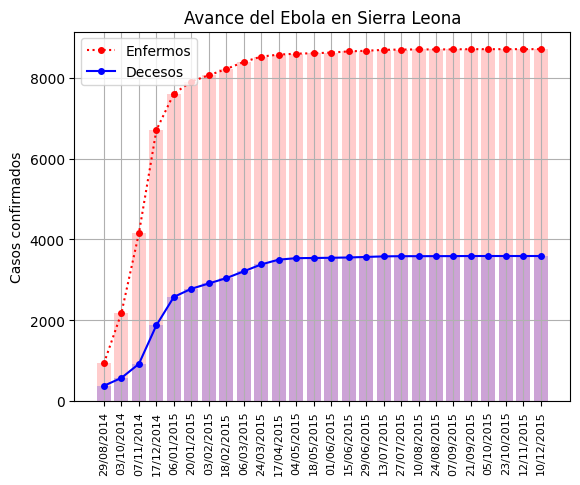

In [21]:
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]
Dates=SL.index[0:-1:10]
plt.plot(Dates,NCC,'o:r',ms=4,label='Enfermos')
plt.bar(Dates,NCC,color='red',alpha=0.2)
plt.plot(Dates,NCD,'o-b',ms=4,label='Decesos')
plt.bar(Dates,NCD,color='blue',alpha=0.2)
plt.grid()
plt.title('Avance del Ebola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.legend()
plt.xticks(rotation=90,fontsize=8)  # Rotar las fechas en el eje x
plt.savefig('SierraLeona.png', dpi=300, format='png')
plt.show()

In [22]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
# porcentaje de Infectados contra recuperados
SL['PIvsD']=PIvsD

In [23]:
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['recuperados']=recuperados

In [24]:
SL['PR']=(100-PIvsD)

In [25]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female,PIvsD,recuperados,PR
Date,,,,,,,,,,,,,
29/08/2014,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40,40.641711,555.0,59.358289
05/09/2014,1146,443.0,687.6,458.4,206.28,137.52,412.56,275.04,68.76,45.84,38.656195,703.0,61.343805
08/09/2014,1234,461.0,740.4,493.6,222.12,148.08,444.24,296.16,74.04,49.36,37.358185,773.0,62.641815
12/09/2014,1287,478.0,772.2,514.8,231.66,154.44,463.32,308.88,77.22,51.48,37.140637,809.0,62.859363
16/09/2014,1464,514.0,878.4,585.6,263.52,175.68,527.04,351.36,87.84,58.56,35.109290,950.0,64.890710


In [26]:
PIvsD_prom=SL['PIvsD'].mean()
PR_prom=SL['PR'].mean()

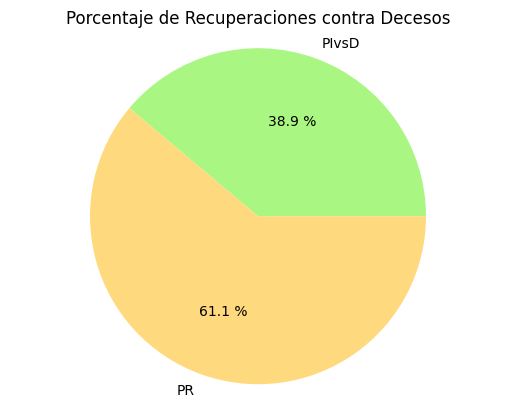

In [27]:
porcentajes=[PIvsD_prom,PR_prom]
etiquetas=['PIvsD','PR']
colores=["#AAF683","#FFD97D"]
plt.pie(porcentajes,labels=etiquetas,autopct="%0.1f %%",colors=colores)
plt.axis("equal")
plt.title("Porcentaje de Recuperaciones contra Decesos")
plt.show()

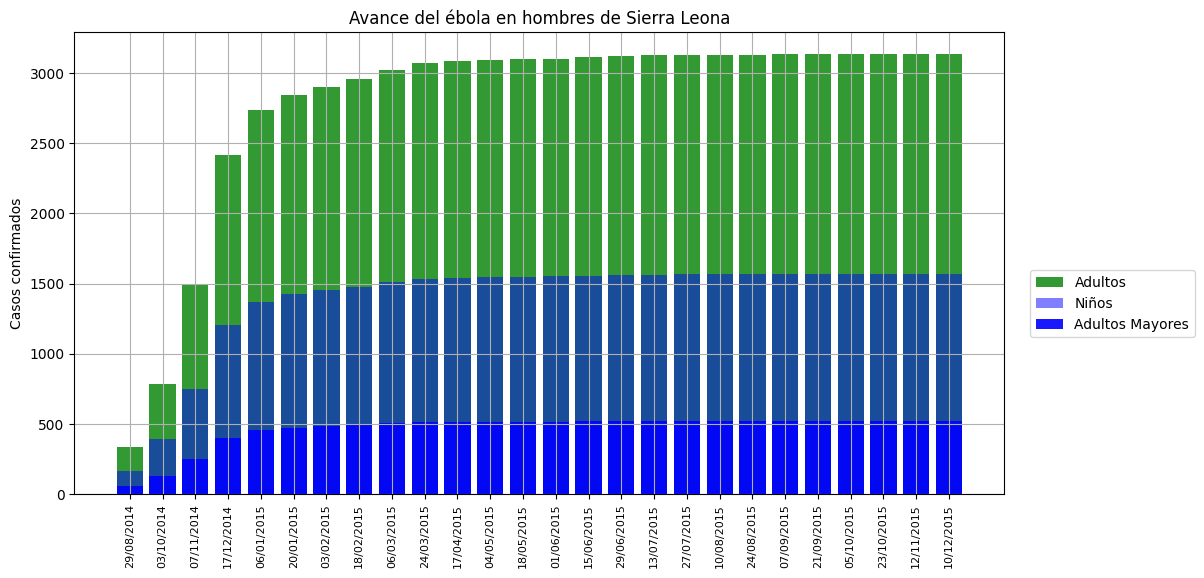

In [28]:
B=SL['Boys'][0:-1:10]
AM=SL['Adult Male'][0:-1:10]
OM=SL['Old Male'][0:-1:10]
Dates=SL.index[0:-1:10]

fig = plt.figure(figsize=(12, 6))  # Ajusta el ancho y el alto como desees

plt.bar(Dates,AM,color='green',alpha=0.8,label='Adultos')
plt.bar(Dates,B,color='blue',alpha=0.5,label='Niños')
plt.bar(Dates,OM,color='blue',alpha=0.9,label='Adultos Mayores')
plt.grid()
plt.title('Avance del ébola en hombres de Sierra Leona')
plt.ylabel('Casos confirmados')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))
plt.xticks(rotation=90,fontsize=8)  # Rotar las fechas en el eje x
plt.savefig('MaleSL.png', dpi=300, format='png')
plt.show()

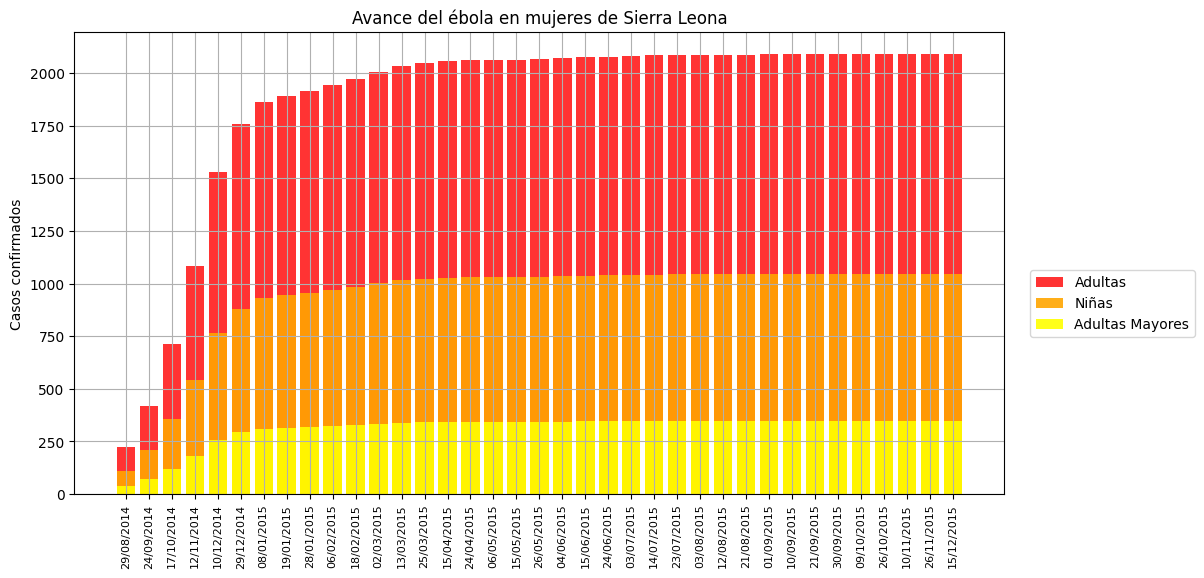

In [29]:
G=SL['Girls'][0:-1:7]
AF=SL['Adult Female'][0:-1:7]
OF=SL['Old Female'][0:-1:7]
Dates=SL.index[0:-1:7]

fig = plt.figure(figsize=(12, 6))  # Ajusta el ancho y el alto como desees
plt.bar(Dates,AF,color='red',alpha=0.8,label='Adultas')
plt.bar(Dates,G,color='orange',alpha=0.9,label='Niñas')
plt.bar(Dates,OF,color='yellow',alpha=0.9,label='Adultas Mayores')
plt.grid()
plt.title('Avance del ébola en mujeres de Sierra Leona')
plt.ylabel('Casos confirmados')
plt.xticks(rotation=90,fontsize=8)  # Rotar las fechas en el eje x
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5))
plt.savefig('FemaleSL.png', dpi=300, format='png')
plt.show()

In [30]:
Boys=SL['Boys'].to_numpy()
SL_Boys=pd.DataFrame({'Boys':Boys})
SL_Boys.index=pd.to_datetime(SL.index, format='%d/%m/%Y')
SL_Boys=SL_Boys.sort_index()

Fechas train : 2014-08-29 00:00:00 --- 2015-09-08 00:00:00  (n=202)
Fechas test  : 2015-09-09 00:00:00 --- 2016-03-23 00:00:00  (n=57)


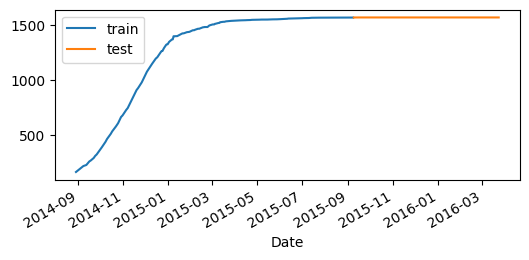

In [31]:
# Separación datos train-test
# ==============================================================================
steps = 57
datos_train = SL_Boys[:-steps]
datos_test  = SL_Boys[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['Boys'].plot(ax=ax, label='train')
datos_test['Boys'].plot(ax=ax, label='test')
ax.legend();

In [32]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

In [33]:
forecaster.fit(y=datos_train['Boys'])
forecaster

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:788: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 201] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-09 08:17:45 
Last fit date: 2023-11-09 08:17:46 
Skforecast version: 0.10.1 
Python version: 3.10.12 
Forecaster id: None 

In [34]:
# Predicciones
# ==============================================================================
steps = 57
predicciones = forecaster.predict(steps=steps)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:850: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [35]:
predicciones.index=datos_test.index

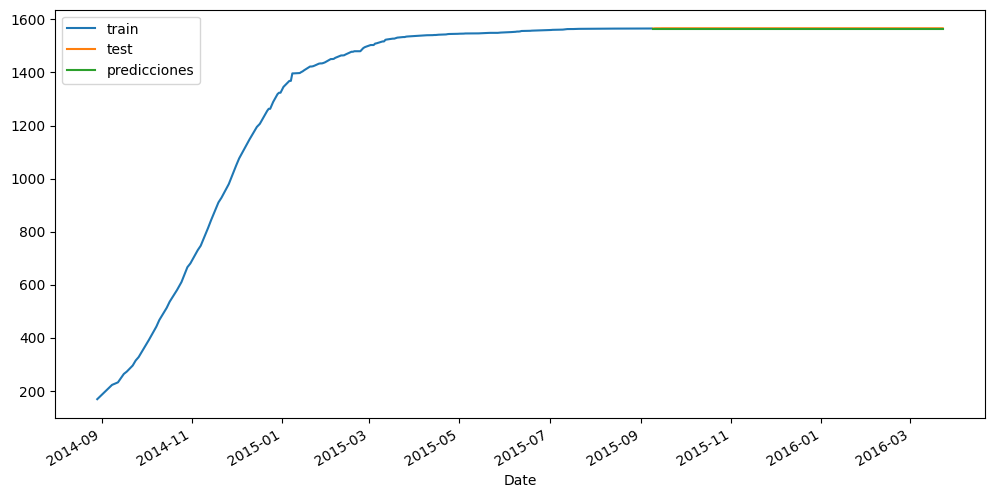

In [36]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
datos_train['Boys'].plot(ax=ax, label='train')
datos_test['Boys'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

#

In [37]:
SL_girls=SL['Girls']
SL_girls=pd.DataFrame(SL_girls)

In [38]:
future_days = 50
SL_girls['Prediction']=SL_girls['Girls'].shift(-future_days)

In [39]:
X = np.array(SL_girls.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 112.2 ]
 [ 137.52]
 [ 148.08]
 [ 154.44]
 [ 175.68]
 [ 181.56]
 [ 196.8 ]
 [ 209.4 ]
 [ 217.92]
 [ 249.12]
 [ 261.48]
 [ 294.6 ]
 [ 311.16]
 [ 341.88]
 [ 357.24]
 [ 386.76]
 [ 406.68]
 [ 444.  ]
 [ 453.36]
 [ 486.84]
 [ 497.88]
 [ 542.76]
 [ 561.96]
 [ 606.72]
 [ 618.24]
 [ 652.92]
 [ 699.72]
 [ 717.36]
 [ 765.  ]
 [ 796.56]
 [ 804.24]
 [ 837.  ]
 [ 842.04]
 [ 842.04]
 [ 859.2 ]
 [ 879.12]
 [ 882.48]
 [ 882.48]
 [ 897.12]
 [ 908.4 ]
 [ 912.24]
 [ 912.24]
 [ 931.08]
 [ 931.08]
 [ 931.92]
 [ 931.92]
 [ 934.32]
 [ 936.24]
 [ 939.  ]
 [ 945.96]
 [ 948.36]
 [ 948.36]
 [ 949.08]
 [ 950.52]
 [ 955.56]
 [ 956.16]
 [ 956.16]
 [ 957.24]
 [ 958.68]
 [ 965.04]
 [ 967.08]
 [ 967.08]
 [ 967.56]
 [ 970.08]
 [ 976.2 ]
 [ 976.2 ]
 [ 976.56]
 [ 978.6 ]
 [ 983.88]
 [ 985.44]
 [ 985.44]
 [ 986.76]
 [ 986.76]
 [ 986.76]
 [ 994.68]
 [ 996.96]
 [ 998.4 ]
 [1002.36]
 [1002.36]
 [1005.96]
 [1006.68]
 [1011.36]
 [1011.36]
 [1015.56]
 [1016.28]
 [1018.08]
 [1018.44]
 [1018.44]
 [1020.96]
 [1022.16]
 [1022.4 ]

<ipython-input-39-ca6c18959067>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(SL_girls.drop(['Prediction'], 1))[:-future_days]


In [40]:
y = np.array(SL_girls['Prediction'])[:-future_days]
print(y)

[ 948.36  948.36  949.08  950.52  955.56  956.16  956.16  957.24  958.68
  965.04  967.08  967.08  967.56  970.08  976.2   976.2   976.56  978.6
  983.88  985.44  985.44  986.76  986.76  986.76  994.68  996.96  998.4
 1002.36 1002.36 1005.96 1006.68 1011.36 1011.36 1015.56 1016.28 1018.08
 1018.44 1018.44 1020.96 1022.16 1022.4  1022.4  1023.48 1023.84 1026.6
 1026.96 1027.2  1027.56 1027.56 1027.92 1028.28 1028.64 1028.76 1029.
 1029.72 1030.08 1030.2  1030.32 1030.56 1030.8  1031.04 1031.4  1031.4
 1031.64 1031.64 1031.64 1031.64 1031.64 1031.64 1031.76 1032.36 1032.6
 1032.6  1032.84 1032.96 1032.96 1032.96 1032.96 1033.32 1033.68 1034.16
 1034.4  1034.4  1034.76 1034.88 1035.6  1036.2  1036.2  1036.56 1037.64
 1037.88 1037.88 1037.88 1038.12 1038.48 1038.84 1038.84 1038.84 1039.2
 1039.44 1039.68 1039.8  1039.8  1040.16 1040.52 1040.76 1040.88 1040.88
 1041.   1041.12 1042.44 1042.56 1042.56 1042.56 1042.56 1043.04 1043.04
 1043.04 1043.16 1043.16 1043.28 1043.28 1043.28 1043.28 10

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [43]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [44]:
x_future = SL_girls.drop(['Prediction'], 1)[:-future_days]
x_future

<ipython-input-44-4d6bea713013>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = SL_girls.drop(['Prediction'], 1)[:-future_days]


,Girls
Date,
29/08/2014,112.20
05/09/2014,137.52
08/09/2014,148.08
12/09/2014,154.44
16/09/2014,175.68
...,...
11/09/2015,1044.36
14/09/2015,1044.36
15/09/2015,1044.48


In [45]:
x_future = x_future.tail(future_days)
x_future

,Girls
Date,
10/07/2015,1041.12
13/07/2015,1042.44
14/07/2015,1042.56
15/07/2015,1042.56
16/07/2015,1042.56
17/07/2015,1042.56
20/07/2015,1043.04
21/07/2015,1043.04
22/07/2015,1043.04


In [46]:
x_future = np.array(x_future)
x_future.shape

(50, 1)

In [47]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48
 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48
 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48
 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48
 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48 1044.48
 1044.48 1044.48 1044.48 1044.48 1044.48]


In [48]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1041.81692091 1041.95404724 1041.96651327 1041.96651327 1041.96651327
 1041.96651327 1042.0163774  1042.0163774  1042.0163774  1042.02884343
 1042.02884343 1042.04130946 1042.04130946 1042.04130946 1042.04130946
 1042.04130946 1042.05377549 1042.05377549 1042.05377549 1042.06624152
 1042.06624152 1042.07870755 1042.07870755 1042.07870755 1042.07870755
 1042.07870755 1042.07870755 1042.07870755 1042.07870755 1042.07870755
 1042.07870755 1042.07870755 1042.07870755 1042.07870755 1042.07870755
 1042.07870755 1042.09117358 1042.09117358 1042.09117358 1042.09117358
 1042.09117358 1042.10363961 1042.10363961 1042.10363961 1042.1410377
 1042.15350373 1042.15350373 1042.16596976 1042.16596976 1042.16596976]


In [49]:
predictions = tree_prediction
valid = SL_girls[X.shape[0]:]
valid

,Girls,Prediction
Date,,
18/09/2015,1044.48,NaN
21/09/2015,1044.48,NaN
22/09/2015,1044.48,NaN
23/09/2015,1044.48,NaN
24/09/2015,1044.48,NaN
25/09/2015,1044.48,NaN
28/09/2015,1044.48,NaN
29/09/2015,1044.48,NaN
30/09/2015,1044.48,NaN


In [50]:
valid['Predictions'] = predictions
valid

<ipython-input-50-d3e11ce66c00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Girls,Prediction,Predictions
Date,,,
18/09/2015,1044.48,NaN,1044.48
21/09/2015,1044.48,NaN,1044.48
22/09/2015,1044.48,NaN,1044.48
23/09/2015,1044.48,NaN,1044.48
24/09/2015,1044.48,NaN,1044.48
25/09/2015,1044.48,NaN,1044.48
28/09/2015,1044.48,NaN,1044.48
29/09/2015,1044.48,NaN,1044.48
30/09/2015,1044.48,NaN,1044.48


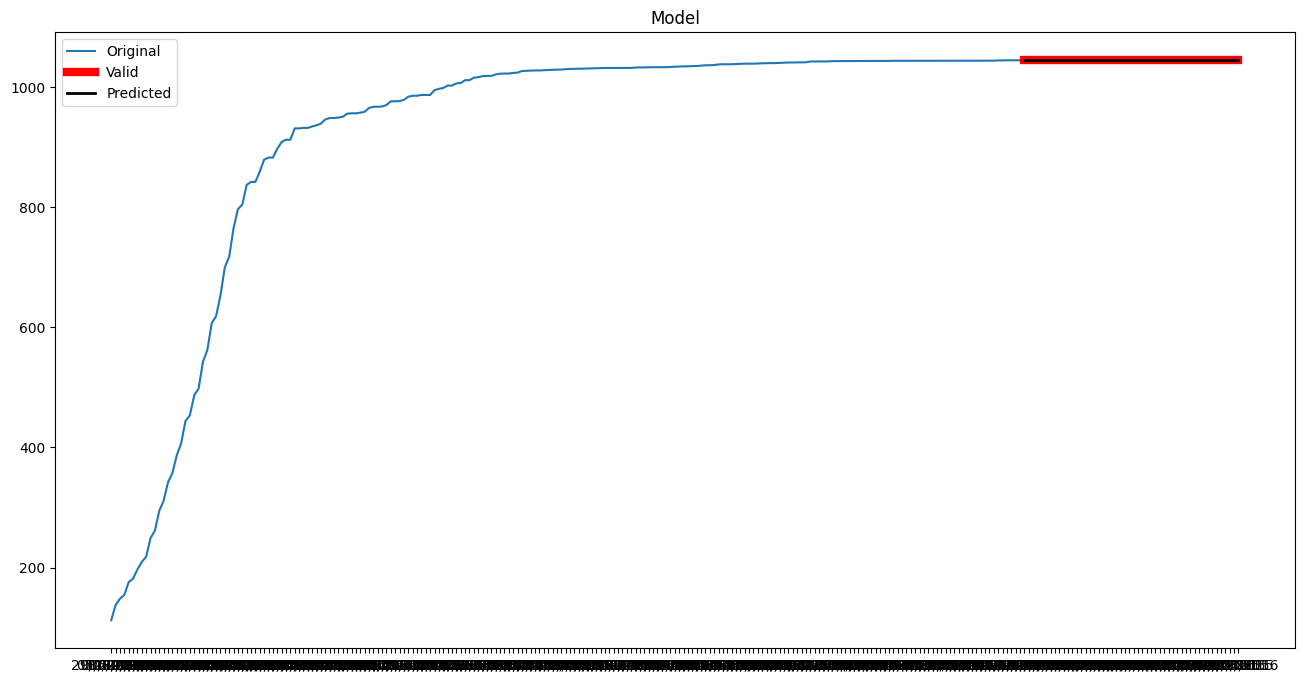

In [51]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.plot(SL_girls['Girls'])
plt.plot(valid['Girls'],'-r',lw=6)
plt.plot(valid['Predictions'],'-k',lw=2)
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()